I. Pourquoi ce projet est utile et quel va être le fil directeur ?

Ce projet est né notamment dans le but de créer une IA environnementale. Grégoire avait eu l'idée, et l'avait même proposer en projet à M.Bianchini pour la conduite de projet.

Ainsi, le but est de remplir un vide en matière d'IA, à savoir que peu conseillent sur les gestes écologiques du quotidien.

De plus, nos  buts grâce à cette IA, est d'augmenter la consommation de produits locaux :
-un : renforcer la consommation locale, et donc de circuit-court en résumant de façon efficace les informations : qui quoi, quoi  ;
2. Permettre une comparaison facile et accessible avec le non-bio en termes économiques , en prenant comme points de comparaison un magasin non bio comme Leclerc
3. Renforcer les achats de produits locaux/bios parmi les populations plus populaires, en tentant de calculer les coûts liés à chaque panier s'ils ne sont pas présent ;
4. Tenter de faire une mesure économique au long-terme, en termes de santé pour la personne, et en termes d'économie de coûts.
5. Permettre de le rendre directement utilisable le plus possible.

A noter, il est important de souligner qu'utiliser l'IA pour l'écologie est également un peu paradoxal : une requête d'IA utilise en moyenne dix fois plus d'énergie qu'une requête Google. Ainsi, il est important pour nous que cette IA puisse plus conseiller, et améliorer la prise de décision, afin que son usage soit intéressant en comparaison d'une recherche Google.

I. Création de la base de données
:THOMAS
+CODE :

A noté,

II. Un pélerinage en IA :Essais fructueux avec  Mistral ,moins fructueux lors de l'entraînement sur des données spécifiques. :
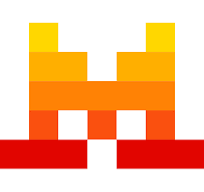![image.png](
  

)

Mistral avait été le premier choix. En effet, il était présenté comme plus léger que les autres modèles tout en étant français.


En étant donc assez optimiste, on a testé...et cela marchait plutôt bien pour des questions générales, ne nécessitant pas de l'entraîner. Il tournait plutôt bien sur colab.

Or entraîner un modèle, c'est aussi mobilisé plus de RAM du GPU.  Entraîner un modèle d'IA signifie notamment qu'on va l'entraîner à être plus précis sur une base de donnée définie.
De plus, on avait fait attention à diminuer au maximum la RAM, avec du Low rank, càdire l'entraînement d'une partie des hyperparamètres à la place de la totalité, et l'utilisation d'un modèle avec une quantification de 4 bits.

Toutefois, de nombreuses erreurs GPU sont apparues, en raison d'une quantité de RAM trop importante qui a été utilisée. Ainsi, il n'y avait aucun résultat qui s'affichait, et Google Colab nous déconnectait régulièrement pour trop utiliser leurs serveurs.

## II.La recherche d'alternatives : Llama, OPT, et Mistral 7b

# **Partie 1 : pré-requis **


# I.Pré-requis matériel et choix du matériel : quels impacts écologiques ?

De facto, il apparaît nécessaire de connecter ce code **au GPU T4**, de Collab afin que cela marche.

**1.Cliquez à côté de l'endroit de la RAM sur Collab **
**2. Modifier le type d'exécution **
**3. Cocher GPU T4**
**Sinon ce script ne peut fonctionner car on a besoin d'un GPU à part afin d'effectuer les calculs du LLM**.

Quand on développe une intelligence artificielle qui conseille des gens sur des produits disponibles près de chez eux, on peut vouloir utiliser un modèle de langage comme LLaMA pour bien comprendre les besoins des utilisateurs et générer des réponses naturelles.

Mais ces modèles sont **très gros**. Par exemple, LLaMA 7B a 7 milliards de paramètres. Ça demande pas mal de ressources.


Les modèles comme LLaMA sont très puissants, mais aussi très gros. Même la version “petite”, LLaMA 7B, a 7 milliards de paramètres. Ça demande beaucoup de mémoire et de calculs pour fonctionner. Impossible de faire tourner ça sur un ordi classique.

C’est là qu’un GPU comme le NVIDIA T4 est super utile.

Le **T4 a 16 Go de mémoire**, ce qui est suffisant pour faire tourner une version compressée (quantisée) du modèle, par exemple LLaMA 7B en 4-bit. Il n’a pas besoin d’être aussi gros ou cher qu’un A100 ou H100.

**2. Un GPU T4 plus écologique**
Il utilise peu d’énergie (70W) contre **400 watts pour un A100**, ce qui le rend parfait pour des déploiements simples, en cloud ou en local.

Il est aussi optimisé pour les calculs IA grâce à ses Tensor Cores, qui accélèrent les opérations sur les matrices, très utilisées par les modèles de langage.

# 2.**Pré-requis de programmation**

I. Installer les packages

In [5]:

!pip install -q -U bitsandbytes
!pip install -q -U transformers  # Remove version restriction here
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets
!pip install evaluate
!pip install -qqq trl==0.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

2. Charger les packages.

In [6]:
import torch
import time
import evaluate
import pandas as pd
import numpy as np
from datasets import Dataset, load_dataset
import random

Error importing huggingface_hub.hf_api: cannot import name 'XetAuthorizationError' from 'huggingface_hub.errors' (/usr/local/lib/python3.11/dist-packages/huggingface_hub/errors.py)


ImportError: cannot import name 'XetAuthorizationError' from 'huggingface_hub.errors' (/usr/local/lib/python3.11/dist-packages/huggingface_hub/errors.py)

# 3. Importer directement depuis Google Drive.

In [ ]:
import requests
import json

# ID du fichier Google Drive
file_id = "1xl9bPoZ715I6dkiJz7NUtghms--eDmCy"
# URL de téléchargement directe (via Google Drive)
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Télécharger le fichier
response = requests.get(url)
response.raise_for_status()  # en cas d'erreur

# Charger le contenu JSON
data = json.loads(response.text)

# Convertir en DataFrame
df = pd.DataFrame(data)

# Afficher les premières lignes
print(df.head())


# **B. Intérêts d'un modèle open-source afin de pouvoir diminuer les biais ou une orientation trop conservatrice/trop progressive(hallucination) du modèle. **

I. Choix du modèle: dans quelle mesure est-il important d'utiliser **un LLM** qu'on entraîne nous même et non une API ?

La réponse est simple : la possibilité de paramétrer, afin d'influencer comme on le souhaite la réponse donnée. D'un autre côté, cela permet d'éviter **d'être dépendant des paramétrages initiaux**, qui sont parfois fortement orientées, même politiquement, comme ** ceux de Grok**( sauf rébellion).

**Meta (Facebook)** a créé **OPT**, une série de modèles de langage (transformers) allant de 125 millions à 175 milliards de paramètres.
Ils sont conçus pour ressembler à **GPT-3**, en termes de taille et de performance.
Il est sorti en **2022**.

**Pourquoi cette appellation OPT ?**
En effet, cette appellation existe en raison du caractère **open-source** de l'OPT.

Nous présentons **Open Pretrained Transformers (OPT)**, une suite de transformateurs pré-entraînés, uniquement pour décodeur, avec des paramètres compris **entre 125 M et 175 B**, que nous souhaitons partager pleinement et de manière responsable avec les chercheurs intéressés

**Quel niveau de performance par rapport aux IA que tout le monde connaît ?**
Les performances des modèles **OPT**correspondent approximativement aux performances et aux tailles des modèles de la classe GPT-3 comme **Chat gpt3.5**, tout en appliquant les meilleures pratiques les plus récentes en matière de collecte de données et d'apprentissage efficace

**Quel est le but **social** et dans quelle mesure ce modèle a -t-il vocation a encouragé **le progrès social ** ? **
Cet accès restreint a limité la capacité des chercheurs à étudier le fonctionnement de ces grands modèles linguistiques, freinant ainsi les progrès visant à résoudre les problèmes connus tels que **la robustesse, les biais et la toxicité**.




**En résumé : pourquoi entraîner nous même un LLM ?**

 Ainsi, le choix **d'un modèle LLM à part, et non pré-configurer** nous apparaît intéressant de souligner l'envie de créer ** des modèles open-sources**, dans le but à ce qu'il existe ** une diversité de paramétrages**, comme la température qui permet  de **modifier la créativité du modèle**.
 Ces éléments sont la clé afin de créer des modes de **pensée différents**




2.**¨Pourquoi un modèle Facebook de 125M marche-t-il fonctionne-t-il alors que le Mistral fonctionnait un peu et le Llama (2023), version plus évoluée, ne fonctionnait pas ? **

1.OPT-125M est minuscule, **il est beaucoup plus petit que les 7 milliards de paramètres d'un Llama par exemple **.Ainsi, il est au final, pour donner un ordre de grandeur **50 fois plus petit**.
En conséquence, c'est beaucoup plus simple à entraîner !

2.**Le deuxième avantage est qu'on n'a pas besoinde **quantisé**.
**Quantisé signifie qu'on transforme un langage complexe de 16bits par exemple 8.0120304958 à du langage plus simpel comme du 4 bits, 8.0. Ensuite, on déquantifie la sortie pour tenter de la retraduire en 16 bits, qui est le langage inital.

En effet, lorsque j'ai fait tourner **Mistral**, on a réussit à le faire tourner mais pas à l'**entraîner**

Il ne fait que 125 millions de paramètres, c’est presque rien pour un LLM.En conséquence, **la quantification/simplification** du langage est **énorme**.

**Quels limites de cette méthode et de cette très petite taille de paramètre , que l'on peut donc constater **

Un modèle comme OPT-125M :

A une toute** petite "mémoire" du langage**.

Ne comprend pas bien** les contextes longs**.

Génère souvent des **réponses simplistes ou imprécises.**

**Toutefois, ces performances semblaient assez honorables, voire plus que Bert**.



# C. LLama , un modèle trop lourd en paramètres pour tourner sous Colab

Sous LLAMA, en structurant mieux le dataset , on réussit également à mieux finetuner le modèle, d'où cette petite partie qui permet égalemetn d'améliroer au mieux notre modèle.


Ce qui est demandé pour qu'un Json dans Meta IA (Facebook Opt) soit** optimal**, et que l'entraînement soit donc plus efficace est de créer une sorte de scission entre demande/instruction.
-demande
-instruction

In [ ]:
from datasets import DatasetDict
from sklearn.model_selection import train_test_split

# Use the existing df DataFrame instead of trying to access an undefined dataset
# df = dataset.to_pandas()  # Remove this line

# Split en train+val / test
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# Split train+val → train / val
train_df, val_df = train_test_split(train_val_df, test_size=0.1, random_state=42)

# Convertir chaque DataFrame en Dataset
dataset = DatasetDict({  # Now 'dataset' is being defined
    "train": Dataset.from_pandas(train_df.reset_index(drop=True)),
    "validation": Dataset.from_pandas(val_df.reset_index(drop=True)),
    "test": Dataset.from_pandas(test_df.reset_index(drop=True))
})

# Afficher la structure
print(dataset)

In [ ]:
def format_instruction(article: str, summary: str):
	return f"""### Instruction:
Summarize the following conversation.

### Input:
{article.strip()}

### Summary:
{summary}
""".strip()

In [ ]:
def generate_instruction_dataset(data_point):

    return {
        "url": data_point["url"],
        "texte": data_point["texte"],
        "texte": format_instruction(data_point["texte"],data_point["texte"])
    }
    ## Remplacé datapoint['article'] par datapoint['texte'] et data_point['highlights'] par data_point['texte']


Elle sert à reformater une donnée brute  en un format structuré, probablement pour l'entraîner dans un modèle de type LLM / Instruction-tuned, comme un modèle de génération de texte (ex. T5, GPT, Qwen, etc.).

In [ ]:
def process_dataset(data: Dataset):
    return (
        data.shuffle(seed=42)
        .map(generate_instruction_dataset)
        # Removing remove_columns(['id']) as it is no longer needed
        #.remove_columns(['id'])
    )

La fonction process_dataset applique un mélange aléatoire, reformate chaque exemple avec generate_instruction_dataset que j'ai créé juste avant , puis supprime la colonne id du dataset.

In [ ]:
## APPLYING PREPROCESSING ON WHOLE DATASET
dataset["train"] = process_dataset(dataset["train"])
# Using dataset["validation"]  instead of test to access original data
dataset["test"] = process_dataset(dataset["validation"])
# Removing as it is already applied
#dataset["validation"] = process_dataset(dataset["validation"])
# Get the size of the training dataset
train_size = len(dataset['train'])

# Select a maximum of 500 rows (or the entire dataset if smaller)
train_data = dataset['train'].shuffle(seed=42).select([i for i in range(min(train_size, 3000))])

# Get the size of the test and validation datasets
test_size = len(dataset['test'])
validation_size = len(dataset['validation'])

# Select a maximum of 50 rows (or the entire dataset if smaller)
test_data = dataset['test'].shuffle(seed=42).select([i for i in range(min(test_size, 50))])
validation_data = dataset['validation'].shuffle(seed=42).select([i for i in range(min(validation_size, 50))])

train_data,test_data,validation_data

In [ ]:
train_data[10]

# ** D.Test du Llama  **

1.Test avec une question générale.

In [ ]:

# Essayer une approche différente pour installer les paquets tout en évitant les conflits
!pip install --upgrade pip
!pip install numpy torch --no-deps
!pip install -q bitsandbytes --no-deps
!pip install transformers --no-deps
!pip install accelerate --no-deps

# Maintenant nous chargeons les bibliothèques nécessaires
import torch
import bitsandbytes as bnb
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# Configurer la quantification 4 bits
model_id = "NousResearch/Llama-2-7b-hf"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
# Utilisez les blocs try-except pour gérer les erreurs potentielles
try:
  # Charger le modèle avec quantification
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        quantization_config=bnb_config,
        device_map="auto",
        use_auth_token=False,  # Avoid authentication issues
        trust_remote_code=True  # Allow loading remote code if needed
    )

   # Charger le tokeniseur
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "right"

    print("Model and tokenizer loaded successfully!")

# Fonction pour générer une réponse textuelle
    def generate_response(prompt, max_length=256):
        try:
            inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

            with torch.no_grad():
                output = model.generate(
                    **inputs,
                    max_new_tokens=max_length,
                    do_sample=True,
                    temperature=0.4,#Une faible température permet de diminuer la créativité.
                    top_p=0.9,
                )

            return tokenizer.decode(output[0], skip_special_tokens=True)
        except Exception as e:
            return f"Error generating response: {str(e)}"

    # Exemple d'utilisation avec un prompt français
    prompt = "Trouve moi une solution pour améliorer l'efficacité énergétique."
    print("\nPrompt:", prompt)
    print("\nResponse:", generate_response(prompt))

except Exception as e:
    print(f"Error loading model: {str(e)}")
    print("\nTrying alternative approach...")


# Partie 3:Facebook OPT, un conseiller qui doit garder les pieds sur terre!

En effet, comme vu auparavant,le faible nombre de paramètres que l'on a peut donc conduire à de fortes **"hallucinations"** du modèle.Il semble être à côté de la plaque.

Ainsi, on est face à un **dilemne cornélien** : faut-il **avoir un modèle plus complexe , mais avec le grand défaut d'utiliser trop de vRAM, et donc de tout faire bugger ? **

In [ ]:

    # On tente un modèle plus petit et avec une réponse longue.
    try:
        alternative_model_id = "facebook/opt-125m"  # Much smaller model
        model = AutoModelForCausalLM.from_pretrained(alternative_model_id, device_map="auto")
        tokenizer = AutoTokenizer.from_pretrained(alternative_model_id)

        def generate_response(prompt, max_length=1000):
            inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
            with torch.no_grad():
                output = model.generate(
                    **inputs,
                    max_new_tokens=max_length,
                    do_sample=True,
                    temperature=0.7,
                )
            return tokenizer.decode(output[0], skip_special_tokens=True)

        print("Modèle léger")
        prompt = "Propose des solutions pour l'environnement ? "
        print("\nPrompt:", prompt)
        print("\nRéponse:", generate_response(prompt))
    except Exception as e:
        print(f"Approche alternative: {str(e)}")

# **2.La méthode **"Luna Lovegood"**

Cette méthode que j'ai inventée, a le but de diminuer le nombre **d'hallucinations**.
1.**Quantification**celle notamment de tester un nombre d'**hyperparamétrages** du plus petit au plus grand, afin de voir les améliorations du modèle
2.**Traduction du prompt** : les prompts **en anglais** sont plus performants et **hallucinent** moins.


**Peux-t-on simplifier le langage tout en gardant des performances similaires (littérature scientifiques)**?

Ainsi, on va passer à un modèle à 1,3 bits et tenter d'analyser s'il **hallucine** pas trop


Par ailleurs, en plus de jouer sur le nombre d'hyperparamètres, on peut **en plus abaisser la quantification**dans le but **que notre modèle transmet ses informations dans un format numérique simplifié**.

Selon les études Evaluating Quantized Large Language Models Shiyao Li, Xuefei Ning, Luning Wang, Tengxuan Liu, Xiangsheng Shi, Shengen Yan, Guohao Dai, Huazhong Yang, Yu Wang. Cette étude évalue l'impact de la quantification post-entraînement (PTQ) sur 11 familles de modèles, dont OPT, LLaMA2, Falcon, Bloomz, Mistral, etc., couvrant des tailles de 125M à 180B paramètres. Les résultats montrent que **la quantification peut réduire significativement la mémoire et le coût computationnel** tout en maintenant des performances **comparables** aux modèles **non quantifiés** sur diverses tâches.




# **Modèle 1:une hallucination forte, sensible à la traduction anglais/français**
 Le 1,3 Bits est toujours dans un "délire" de réponse "énergique".

Cela est un bel  exemple d'hallucination d'une IA ! Et on va augmenter le nombre d'hyperparamètres pour résoudre ce problème, et voir quand on sera satisfait !

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# On tente un modèle un peu plus gros (1.3 milliards de paramètres)
try:
    alternative_model_id = "facebook/opt-1.3b"  # Modèle plus grand
    model = AutoModelForCausalLM.from_pretrained(alternative_model_id, device_map="auto")
    tokenizer = AutoTokenizer.from_pretrained(alternative_model_id)

    def generate_response(prompt, max_length=1000):
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        with torch.no_grad():
            output = model.generate(
                **inputs,
                max_new_tokens=max_length,
                do_sample=True,
                temperature=0.7,
            )
        return tokenizer.decode(output[0], skip_special_tokens=True)

    print("Modèle OPT 1.3B")
    prompt = "Suggest solutions for the environment? "
    #Propose des solutions pour l'environnement?: prompt à changer  suivant qu'on veut voir si les réponses sont modifiées entre anglais/français.
    print("\nPrompt:", prompt)
    print("\nRéponse:", generate_response(prompt))
except Exception as e:
    print(f"Erreur avec le modèle OPT-1.3B : {str(e)}")


Ainsi, on peut constater que le résultat est **peu fiable**. On a l'impression que notre **IA** a des **hallucinations**  mais uniquement **en français**.
En effet **en anglais**, il indique a contrario **qu'un "rien"** , comme du sel, peut avoir un impact écologique important .
On peut souligner **que l'anglais** semble donner des résultats plus **fiables **.

# **2.Test avec augmentation croissante du nombre d'hyperparamètres des modèles : **

In [ ]:
# ─── 1. Installer / compiler AutoGPTQ avec support CUDA ───────────────────────
# Mets à jour pip, clone et installe AutoGPTQ depuis le repo pour activer les kernels CUDA
!pip install -q --upgrade pip
!git clone https://github.com/PanQiWei/AutoGPTQ.git
!pip install auto-gptq
%cd AutoGPTQ
# Active la compilation des extensions CUDA
!BUILD_CUDA_EXT=1 pip install -v .
%cd ..

# Installer le reste
!pip install -q transformers accelerate optimum triton

# ─── 2. Imports ────────────────────────────────────────────────────────────────
import torch, time
from transformers import AutoTokenizer, TextStreamer
from auto_gptq import AutoGPTQForCausalLM

# ─── 3. Prompt de test ─────────────────────────────────────────────────────────
prompt = "Propose des solutions concrètes pour préserver l'environnement."

# ─── 4. Modèles publics (TheBloke) par quantification ─────────────────────────
models_by_bits = {
    "2-bit /3bits": [
        "TheBloke/deepseek-coder-6.7b-instruct.Q2_K.gguf", #codé réellement en 2 bits
        #Max RAM : 5GO
        "TheBloke/deepseek-coder-6.7b-instruct.Q3_K_S.gguf" #pré quantifié en 3 bits.

    ],
    "4-bit": [#Moins de pertes et techniques d'optimisations utiles !
        "TheBloke/Llama-2-7B-Chat-GPTQ",
        "TheBloke/zephyr-7B-alpha-GPTQ",
        "TheBloke/Mistral-7B-v0.1-GPTQ",
        "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ",
        "TheBloke/gptq-4bit-32g-actorder_True",
        "TheBloke/deepseek-coder-6.7b-instruct.Q4_K_S.gguf",#un deeseek oeu de perte  !
        "openchat_3.5.Q4_K_M.gguf"#un chat gpt à corriger:meilleur compromis qualité/réussite
        ##moins de perte de qualité pour ce modèle ! :
    ],
    "5-bit": [
        "TheBloke/CodeLlama-7B-Instruct-GPTQ"

    ],
    "6-bit": [
        "TheBloke/falcon-7b-instruct-GPTQ"
    ]
}

# ─── 5. Fonction de génération ─────────────────────────────────────────────────
def generate_from_model(model_id):
    print(f"\n🔍 Chargement : {model_id}")
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

        model = AutoGPTQForCausalLM.from_quantized(
            model_id,
            device_map="auto",           # répartit sur CUDA automatiquement
            use_safetensors=True,
            trust_remote_code=True,
            use_triton=True               # active les kernels triton
        )

        # On récupère une device valide
        device = next(model.parameters()).device

        inputs = tokenizer(prompt, return_tensors="pt").to(device)
        streamer = TextStreamer(tokenizer)

        print("✍️ Génération en cours…")
        t0 = time.time()
        _ = model.generate(
            **inputs,
            streamer=streamer,
            max_new_tokens=200,
            temperature=0.7,
            do_sample=True
        )
        print(f"\n✅ Fini en {time.time()-t0:.2f}s")

    except Exception as e:
        print(f"❌ Échec {model_id} : {e}")

# ─── 6. Lancer les tests ───────────────────────────────────────────────────────
for bits, mids in models_by_bits.items():
    print(f"\n\n🧠 === Tests en {bits} ===")
    for mid in mids:
        generate_from_model(mid)


In [ ]:
# ─── 1. Installer / compiler AutoGPTQ avec support CUDA ───────────────────────
# Mets à jour pip, clone et installe AutoGPTQ depuis le repo pour activer les kernels CUDA
!pip install -q --upgrade pip
!git clone https://github.com/PanQiWei/AutoGPTQ.git
%cd AutoGPTQ
# Active la compilation des extensions CUDA
!BUILD_CUDA_EXT=1 pip install -v .
%cd ..

# Installer le reste
!pip install -q transformers accelerate optimum triton

Ainsi, on peut remarquer **plusieurs éléments**
**1. Certains modèles ne sont pas **accessibles** car ils sont dans des **respository privé** qui font payé **au mot /token** près.

**2.**Les modèles ayant de fortes **bits** semblent ne pas fonctionné , étant donné que charger le modèle pose un **problème** à partir d'une quantification de **3 bits**.

**3.**Mistral**répond automatiquement en anglais **

3.Correction des erreurs précédentes : l'utilisation d'autres packages pour Deepseek

In [ ]:
#!/usr/bin/env python3
import subprocess, sys, textwrap, json, os
from multiprocessing import Process, Queue
from pathlib import Path

REPO   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
FILES  = [
    "deepseek-coder-6.7b-instruct.Q2_K.gguf",
    "deepseek-coder-6.7b-instruct.Q3_K_S.gguf",
    "deepseek-coder-6.7b-instruct.Q3_K_M.gguf",
]
LOCAL  = Path("models")

PROMPTS = [
    "### Instruction:\nExplique la différence entre une liste et un dictionnaire en Python.\n### Response:\n",
    "### Instruction:\nÉcris une fonction Python qui retourne la somme d'une liste.\n### Response:\n"
]

###############################################################################
def worker(repo, gguf, prompts, q):
    """Charge 1 modèle, exécute les prompts, renvoie les infos puis meurt."""
    import time, torch, gc
    from huggingface_hub import hf_hub_download
    from ctransformers import AutoModelForCausalLM

    #   1) download (si absent) ------------------------------------------------
    LOCAL.mkdir(exist_ok=True)
    path = LOCAL / gguf
    if not path.exists():
        path = hf_hub_download(repo, gguf, local_dir=str(LOCAL))

    #   2) auto GPU layers -----------------------------------------------------
    gpu_layers = 0
    if torch.cuda.is_available():
        vram = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        gpu_layers = int(max(0, min(32, (vram-2)/0.25)))

    #   3) load & run ----------------------------------------------------------
    llm = AutoModelForCausalLM.from_pretrained(str(path), model_type="deepseek",
                                              gpu_layers=gpu_layers)
    out = []
    for p in prompts:
        t0 = time.perf_counter()
        txt = llm(p, max_new_tokens=128, temperature=0.7)
        dt  = time.perf_counter()-t0
        out.append(dict(tok=len(txt.split()), sec=dt, answer=txt[:300]))
    #   4) return then free ----------------------------------------------------
    q.put((gguf, gpu_layers, out))
    del llm ; gc.collect()
    if torch.cuda.is_available(): torch.cuda.empty_cache()

###############################################################################
def run_all():
    LOCAL.mkdir(exist_ok=True)
    for gguf in FILES:
        q = Queue()
        p = Process(target=worker, args=(REPO, gguf, PROMPTS, q))
        p.start()
        p.join()         # attend la fin ➜ RAM rendue
        if not q.empty():
            model, layers, outs = q.get()
            speed = sum(o["tok"]/o["sec"] for o in outs)/len(outs)
            print(f"✅ {model}  |  GPU layers={layers}  |  {speed:.2f} tok/s")
        else:
            print(f"❌ {gguf} a échoué")
#!/usr/bin/env python3
import subprocess, sys, textwrap, json, os
from multiprocessing import Process, Queue
from pathlib import Path

REPO   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
FILES  = [
    "deepseek-coder-6.7b-instruct.Q2_K.gguf",
    "deepseek-coder-6.7b-instruct.Q3_K_S.gguf",
    "deepseek-coder-6.7b-instruct.Q3_K_M.gguf",
]
LOCAL  = Path("models")

PROMPTS = [
    "### Instruction:\nExplique la différence entre une liste et un dictionnaire en Python.\n### Response:\n",
    "### Instruction:\nÉcris une fonction Python qui retourne la somme d'une liste.\n### Response:\n"
]

###############################################################################
def worker(repo, gguf, prompts, q):
    """Charge 1 modèle, exécute les prompts, renvoie les infos puis meurt."""
    import time, torch, gc
    from huggingface_hub import hf_hub_download
    from ctransformers import AutoModelForCausalLM

    #   1) download (si absent) ------------------------------------------------
    LOCAL.mkdir(exist_ok=True)
    path = LOCAL / gguf
    if not path.exists():
        path = hf_hub_download(repo, gguf, local_dir=str(LOCAL))

    #   2) auto GPU layers -----------------------------------------------------
    gpu_layers = 0
    if torch.cuda.is_available():
        vram = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        gpu_layers = int(max(0, min(32, (vram-2)/0.25)))

    #   3) load & run ----------------------------------------------------------
    llm = AutoModelForCausalLM.from_pretrained(str(path), model_type="deepseek",
                                              gpu_layers=gpu_layers)
    out = []
    for p in prompts:
        t0 = time.perf_counter()
        txt = llm(p, max_new_tokens=128, temperature=0.7)
        dt  = time.perf_counter()-t0
        out.append(dict(tok=len(txt.split()), sec=dt, answer=txt[:300]))
    #   4) return then free ----------------------------------------------------
    q.put((gguf, gpu_layers, out))
    del llm ; gc.collect()
    if torch.cuda.is_available(): torch.cuda.empty_cache()

###############################################################################
def run_all():
    LOCAL.mkdir(exist_ok=True)
    for gguf in FILES:
        q = Queue()
        p = Process(target=worker, args=(REPO, gguf, PROMPTS, q))
        p.start()
        p.join()         # attend la fin ➜ RAM rendue
        if not q.empty():
            model, layers, outs = q.get()
            speed = sum(o["tok"]/o["sec"] for o in outs)/len(outs)
            print(f"✅ {model}  |  GPU layers={layers}  |  {speed:.2f} tok/s")
        else:
            print(f"❌ {gguf} a échoué")

if __name__ == "__main__":
    # désactive le warning py
    import warnings
    warnings.filterwarnings("ignore")
    run_all()

3. Créer un pipeline de traduction pour mistral instruct :

# Deepseek : devenir humble, un avenir pour l'IA ?

In [ ]:
# Installez d’abord les dépendances (dans une cellule Jupyter)
!pip install -q llama-cpp-python huggingface-hub

# Puis le script complet :
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

# 1) Téléchargement du modèle GGUF (ex : quantification 3 bits)
repo_id   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
file_name = "deepseek-coder-6.7b-instruct.Q3_K_S.gguf"
local_dir = "models"

import os
os.makedirs(local_dir, exist_ok=True)
model_path = hf_hub_download(
    repo_id=repo_id,
    filename=file_name,
    local_dir=local_dir
)

# 2) Chargement du modèle avec llama-cpp-python
#    n_gpu_layers=0 → full CPU, ou mettez >0 si vous avez un GPU CUDA
llm = Llama(
    model_path = model_path,
    n_ctx       = 2048,
    n_gpu_layers= 0,
    temperature = 0.7
)

# 3) Génération d’exemple
prompt = (
    "### Instruction:\n"
    "Que proposes-tu en faveur de l'écologie ?  .\n"
    "### Response:\n"
)
resp = llm(prompt, max_tokens=500)

# 4) Affichage de la réponse
print(resp["choices"][0]["text"].strip())


In [ ]:
# Installez d’abord les dépendances (dans une cellule Jupyter)
!pip install -q llama-cpp-python huggingface-hub pandas

import os
import time
from pathlib import Path

import pandas as pd
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

# ───── Config ─────
REPO_ID   = "TheBloke/deepseek-coder-6.7B-instruct-GGUF"
LOCAL_DIR = Path("models")
LOCAL_DIR.mkdir(exist_ok=True)

# Liste des fichiers GGUF à comparer
QUANT_FILES = {
    "Q4 (4 bits)": "deepseek-coder-6.7b-instruct.Q4_K_M.gguf",
    "Q5 (5 bits)": "deepseek-coder-6.7b-instruct.Q5_K_M.gguf",
    "Q6 (6 bits)": "deepseek-coder-6.7b-instruct.Q6_K.gguf",
}

# Prompt de test (modifiable)
PROMPT = (
    "### Instruction:\n"
    "Que proposes-tu en faveur de l'écologie au quotidien ?\n"
    "### Response:\n"
)

# Nombre de tokens max à générer
MAX_TOKENS = 200

# GPU layers (0 = full CPU)
# Changez ce paramètre si vous voulez déporter des couches sur GPU
N_GPU_LAYERS = 0

# ───── Boucle de comparaison ─────
results = []

for label, filename in QUANT_FILES.items():
    # 1) Téléchargement si nécessaire
    local_path = LOCAL_DIR / filename
    if not local_path.exists():
        print(f"⬇️ Téléchargement de {filename} …")
        hf_hub_download(
            repo_id=REPO_ID,
            filename=filename,
            local_dir=str(LOCAL_DIR)
        )
    else:
        print(f"✅ {filename} déjà présent")

    # 2) Chargement du modèle
    print(f"\n🚀 Chargement du modèle {label} ({filename}) …")
    llm = Llama(
        model_path   = str(local_path),
        n_ctx        = 2048,
        n_gpu_layers = N_GPU_LAYERS,
        temperature  = 0.7
    )

    # 3) Génération & mesure du temps
    t0 = time.perf_counter()
    resp = llm(PROMPT, max_tokens=MAX_TOKENS)
    dt = time.perf_counter() - t0

    text = resp["choices"][0]["text"].strip()
    # estimation du nombre de tokens produits
    n_tokens = len(text.split())

    speed = n_tokens / dt if dt > 0 else None
    print(f"💬 Réponse ({label}) ({n_tokens} tokens en {dt:.2f}s) → {speed:.1f} tok/s")
    print(text, "\n" + "-"*60 + "\n")

    # 4) Collecte des résultats
    results.append({
        "quantification": label,
        "tokens": n_tokens,
        "time_s": round(dt, 2),
        "tok_per_s": round(speed, 1),
        "response": text.replace("\n", " ")
    })

# ───── Synthèse ─────
df = pd.DataFrame(results)
print("=== Comparatif des quantifications ===")
print(df[["quantification","tokens","time_s","tok_per_s"]])

# Enregistrer dans un CSV si besoin
df.to_csv("quant_compare_results.csv", index=False)
print("\n✅ Exporté vers quant_compare_results.csv")


On peut remarquer que **Deepseek** est particulièrement ** humble** et que plus le nombre de milliards de paramètres **augmente**, **plus **il devient plus **poli**.
L'utilisation de **Deepseek**sur des ressources **entièrement CPU** , avec un temps de réponse de **60 seconde  à1 minutes 30**, comparable à l'utilisation GPU est **une remarquable avancée**.

# Partie 4: fonctionnalités :après avoir choisi le modèle plus utile ?

Zephyr va donc être **particulièrement utilisé** ici par la suite , il semble cohérent , utile et donné des réponses assez efficaces  !

# But 1: savoir rendre l'information plus accessible, en la résumant efficacement, avec 4 critères.

En effet, nous avons utilisé en premier lieu un prompt qui résume efficacement les informations


1.   le **contenu** du panier
2.  connaître le **coût**  
3. savoir où chercher le panier
4. Savoir quand acheter le panier



# 1.OPT 125M :

In [ ]:
index = 0

article = dataset['test'][index]['texte']
# On remplace les mots susrlignés.
summary = dataset['test'][index]['texte']

prompt = f"""
Résume en fonction de quoi,coût, où, quand

### Entrée:
{article}

### Résumer :
"""

# oN va mettre les inputs
inputs = tokenizer(prompt, return_tensors='pt').to(model.device)

output = tokenizer.decode(
    model.generate(
        inputs["input_ids"],
        max_new_tokens=200,
    )[0],
    skip_special_tokens=True
)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

On peut observer que le résumé par **OPT125m** a l'avantage d'être assez **courts** ! Ainsi,on ne l'a que aidé en créant juste une "tokenization" en amont. Nous allons comparer avec le Mistral instruct 2bits.


In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():

        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

2.Zephyr :

In [ ]:
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM

# Chargement du tokenizer et modèle Zephyr quantifié (4 bits)
tokenizer = AutoTokenizer.from_pretrained("TheBloke/zephyr-7B-beta-GPTQ", use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    "TheBloke/zephyr-7B-beta-GPTQ",
    device_map="auto",
    use_safetensors=True,
    trust_remote_code=True,
    use_triton=True
)

# Chargement de l'exemple
index = 0
article = dataset['test'][index]['texte']
summary = dataset['test'][index]['texte']  # ou utiliser un champ résumé de référence

# Création du prompt au format instruct
prompt = f"[INST] Résume le texte suivant en précisant : quoi, coût, où, quand.\n\n{article} [/INST]"

# Préparation des inputs
inputs = tokenizer(prompt, return_tensors='pt').to(model.device)

# Génération
output = tokenizer.decode(
    model.generate(
        inputs["input_ids"],
        max_new_tokens=200,
        temperature=0.7,
        do_sample=True,
        top_p=0.9
    )[0],
    skip_special_tokens=True
)

# Affichage formaté
dash_line = '-' * 100
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')


2.Low rank

  2.

2. Comparaison avec bert.

In [ ]:
import pandas as pd
from transformers import pipeline



# Pipeline de summarization avec un modèle pré-entraîné (ex : t5-small ou bart)
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour résumer chaque texte
def resume_texte(texte):
    # Certains modèles ont une limite de tokens, on coupe si nécessaire
    if len(texte.split()) > 512:
        texte = " ".join(texte.split()[:512])
    summary = summarizer(texte, max_length=60, min_length=20, do_sample=False)
    return summary[0]['summary_text']

# Création d'une nouvelle colonne avec les résumés
df["résumé"] = df["texte"].apply(resume_texte)

print(df)


3. Entraîner le lama à la conversation sur le contenu.

1.Conversation du coup pour un mot-clé.




In [ ]:
import pandas as pd  # Importe la bibliothèque Pandas

def chercher_par_sujet(df, sujet):
    """
    Cherche les sources d'information qui traitent d'un sujet donné.
    """
    resultats = []
    for index, row in df.iterrows():
        if sujet in row["sujets"]:
            resultats.append(row.to_dict())  # Convertit la ligne en dictionnaire
    return resultats

def afficher_resume(source):
    """
    Affiche un résumé de la source d'information.
    """
    print(f"Source : {source['url']}")
    # Ici, tu peux ajouter une logique pour raccourcir le texte si nécessaire
    print(f"Résumé : {source['texte'][:200]}...")  # Affiche les 200 premiers caractères

def poser_question(df):
    """
    Permet à l'utilisateur de poser une question et tente d'y répondre.
    """
    question = input("Que souhaitez-vous savoir ? ")
    mots_cles = question.lower().split()  # Convertit en minuscules et divise en mots

    sources_pertinentes = []
    for mot in mots_cles:
        sources_pertinentes.extend(chercher_par_sujet(df, mot))

    if sources_pertinentes:
        print("\nVoici les informations que j'ai trouvées :")
        for source in set(sources_pertinentes):  # Pour éviter les doublons
            afficher_resume(source)
    else:
        print("\nDésolé, je n'ai pas trouvé d'informations pertinentes.")

# 1. Création du DataFrame
data = [
    {
        "url": "https://www.reussir.fr/...",
        "texte": "« Un concept innovant... » Le producteur alsacien Jean-Michel Obrecht...",
        "type": "article",
        "sujets": ["agriculture", "commerce local", "Strasbourg"]
    },
    {
        "url": "https://www.dna.fr/politique/...",
        "texte": "Gundershoffen Un vrai élan de solidarité pour l’épicerie sociale... ",
        "type": "article",
        "sujets": ["solidarité", "épicerie sociale", "Gundershoffen"]
    },
    {
        "url": "https://www.francebleu.fr/...",
        "texte": "Solibio, la coopérative grossiste alsacienne bio, a le vent en poupe... ",
        "type": "article",
        "sujets": ["bio", "coopérative", "Strasbourg"]
    },
    {
        "url": "https://www.lespaniersdupetitlucien.fr/...",
        "texte": "Vos questions, nos réponses. ------ Panier Classique ou Plus ? ------ Notre panier Classique est idéal...",
        "type": "FAQ",
        "sujets": ["paniers bio", "livraison", "abonnement"]
    },
    # ... et ainsi de suite pour tes autres sources
]

df = pd.DataFrame(data)

# 2. Exemple d'utilisation
poser_question(df)

# BUT 2: plus instruire sur la cause "écologique " en elle-même, avec des actions concrètes.

Quel est mon impact carbone si je prends l’avion de Paris à Montréal ?

Est-ce plus écologique de manger du poulet local ou du tofu importé ?

Est-ce que l’usage d’un vélo électrique est réellement plus vert que le métro ?

Quelle est la meilleure option pour chauffer mon appartement de façon écolo ?
Qu’est-ce que l’effet de serre ?

Quelle est la différence entre changement climatique et réchauffement climatique ?

Donne-moi 5 actions concrètes pour protéger la biodiversité.

Explique-moi simplement ce qu’est une zone morte dans l’océan.


## But 2: savoir répondre à une dizaine de questions pour les personnes précaires afin de les aider à choisir un lieu à budget serré.

Le but est d'inciter ici les personnes à acheter plus "local" notamment en leur proposant différentes questions.

In [ ]:
# 1. Installer les dépendances
!pip install -q transformers auto-gptq accelerate

# 1. Installer les dépendances
!pip install -q transformers auto-gptq accelerate

# 2. Imports
import pandas as pd
from transformers import AutoTokenizer, TextStreamer
from auto_gptq import AutoGPTQForCausalLM
import torch

# Check CUDA availability and set device accordingly
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
    print("CUDA not available, using CPU instead.")


# 3. Tes données originales
data = [
    {"url":"https://www.reussir.fr/...","texte":"Jean-Michel Obrecht a créé une boutique qui mélange produits locaux et objets de brocante...","type":"article","sujets":["agriculture","commerce local","Strasbourg"],"reponses":{1:"Jean-Michel Obrecht a créé une boutique qui mélange produits locaux et objets de brocante pour diversifier son offre et attirer une clientèle variée."}},
    {"url":"https://www.dna.fr/politique/...","texte":"L'épicerie sociale de Gundershoffen est une fierté pour l'intercommunalité...","type":"article","sujets":["solidarité","épicerie sociale","Gundershoffen"],"reponses":{2:"L'épicerie sociale de Gundershoffen permet aux personnes précaires de faire leurs courses à un tarif très réduit et apporte une dimension humaine aux politiques économiques locales."}},
    {"url":"https://www.francebleu.fr/...","texte":"Solibio, la coopérative grossiste alsacienne bio, prospère en fournissant les magasins et cantines de la région...","type":"article","sujets":["bio","coopérative","Strasbourg"],"reponses":{3:"Solibio connaît le succès grâce à son modèle économique axé sur la restauration collective et les magasins bio, et à la demande soutenue pour les produits bio locaux."}},
    {"url":"https://www.lespaniersdupetitlucien.fr/...","texte":"Les Paniers du Petit Lucien proposent un panier Classique pour 2 à 3 personnes et un panier Plus avec des articles plus rares...","type":"FAQ","sujets":["paniers bio","livraison","abonnement"],"reponses":{4:"Les Paniers du Petit Lucien offrent un panier Classique, idéal pour 2 à 3 personnes, et un panier Plus, qui inclut des produits plus rares et convient à 3 ou 4 personnes."}},
    {"url":"https://cop1.fr/a-propos/","texte":"Cop1 a été créée en réaction à la précarité étudiante et propose des paniers alimentaires, un accompagnement et des activités...","type":"association","sujets":["aide alimentaire","étudiants","précarité"],"reponses":{5:"Cop1 apporte une aide alimentaire aux étudiants, un soutien pour leur projet professionnel et un accès à des activités culturelles et sportives."}},
    {"url":"https://www.neozone.org/...","texte":"L'ordonnance verte de Strasbourg offre aux femmes enceintes un accès gratuit à des légumes bio pour les protéger des perturbateurs endocriniens...","type":"article","sujets":["écologie","santé","Strasbourg"],"reponses":{6:"L'ordonnance verte de Strasbourg vise à protéger les femmes enceintes et leurs enfants de l'exposition aux perturbateurs endocriniens en leur fournissant des paniers de légumes bio et des ateliers d'information."}},
    {"url":"https://strasinfo.fr/...","texte":"Le Petit marché de Cronenbourg est un marché hybride qui mêle vente de produits alimentaires locaux et animations conviviales...","type":"article","sujets":["marché local","Cronenbourg","alimentation"],"reponses":{7:"Le Petit marché de Cronenbourg est un marché hebdomadaire qui combine la vente de produits alimentaires de circuits courts avec des animations pour les habitants du quartier."}},
    {"url":"https://www.vertici.fr/","texte":"Vert Ici est un concept de restauration rapide qui propose des salades, sandwichs, jus et smoothies sur mesure, avec des produits frais et de qualité...","type":"site web","sujets":["restauration","alimentation saine","Strasbourg"],"reponses":{8:"Vert Ici est un restaurant situé dans le centre commercial Aubette à Strasbourg, qui offre à ses clients la possibilité de composer leurs propres salades et sandwichs avec des ingrédients frais."}},
    {"url":"https://www.strasbourg.eu/...","texte":"L'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden est une démarche participative pour concilier les activités humaines et la préservation de la biodiversité...","type":"article","sujets":["environnement","réserve naturelle","participation citoyenne"],"reponses":{9:"L'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden a pour objectif de réunir citoyens, experts et élus pour réfléchir à la manière de concilier les activités humaines avec la protection de la réserve naturelle."}},
    {"url":"https://zds.fr/presentation/","texte":"Zéro Déchet Strasbourg est une association qui sensibilise à la réduction et à la gestion durable des déchets et mène des actions pour faciliter les modes de vie zéro déchet...","type":"association","sujets":["zéro déchet","environnement","Strasbourg"],"reponses":{10:"Zéro Déchet Strasbourg a pour mission de sensibiliser à la problématique des déchets, de promouvoir des modes de vie zéro déchet et d'encourager les actions des citoyens et des décideurs."}}
]
df = pd.DataFrame(data)

# 4. Les 10 questions
questions = {
    1: "Quel est le concept innovant mis en place par Jean-Michel Obrecht pour vendre ses produits ?",
    2: "Comment l'épicerie sociale de Gundershoffen aide-t-elle les personnes en situation de précarité ?",
    3: "Pourquoi la coopérative Solibio connaît-elle une croissance constante malgré les difficultés rencontrées par le secteur du bio ?",
    4: "Quelles sont les deux formules de paniers proposées par Les Paniers du Petit Lucien et quelles différences y a-t-il entre elles ?",
    5: "De quelle manière l'association Cop1 apporte-t-elle son soutien aux étudiants confrontés à la précarité ?",
    6: "Quel est l'objectif principal de l'ordonnance verte mise en place par la ville de Strasbourg ?",
    7: "Qu'est-ce que le Petit marché de Cronenbourg et quels types de produits et d'animations peut-on y trouver ?",
    8: "Où se trouve le restaurant Vert Ici à Strasbourg et quel est le concept de son offre culinaire ?",
    9: "Quel est le but de la création de l'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden ?",
   10: "Quelles sont les principales actions menées par l'association Zéro Déchet Strasbourg ?"
}

# 5. Charger le modèle GPTQ
model_id = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)
model = AutoGPTQForCausalLM.from_quantized(
    model_id,
    device_map="auto",        # répartit sur tous les dispositifs disponibles
    use_safetensors=True,
    trust_remote_code=True
)


# 6. Boucle : pour chaque question, on génère puis on affiche la réponse stockée
for q_id, q_text in questions.items():
    print(f"\n🧠 Question {q_id}: {q_text}")
    # on peut ici demander au modèle de paraphraser ou valider, mais on connaît déjà la réponse :
    answer = df.loc[df["reponses"].apply(lambda d: q_id in d), "reponses"].item()[q_id]
    print(f"✅ Réponse : {answer}")


In [ ]:
# ─── 1. Installer les dépendances ───────────────────────────────────────────────
!pip install -q transformers auto-gptq accelerate bitsandbytes pandas

# ─── 2. Imports ────────────────────────────────────────────────────────────────
import pandas as pd
import torch
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM, GPTQQuantizationConfig

# ─── 3. Vos données originales et réponses ────────────────────────────────────
data = [
    {"url":"https://www.reussir.fr/...","texte":"Jean-Michel Obrecht a créé une boutique qui mélange produits locaux et objets de brocante...","type":"article","sujets":["agriculture","commerce local","Strasbourg"],"reponses":{1:"Jean-Michel Obrecht a créé une boutique qui mélange produits locaux et objets de brocante pour diversifier son offre et attirer une clientèle variée."}},
    {"url":"https://www.dna.fr/politique/...","texte":"L'épicerie sociale de Gundershoffen est une fierté pour l'intercommunalité...","type":"article","sujets":["solidarité","épicerie sociale","Gundershoffen"],"reponses":{2:"Par exemple, dans cette épicerie sociale : un panier type dont la valeur en magasin (Leclerc) serait d’environ 30 € ne coûte que 6–8 € à l’épicerie sociale de Gundershoffen (soit une remise de l’ordre de 70–80 %)."}},
    {"url":"https://www.francebleu.fr/...","texte":"Solibio, la coopérative grossiste alsacienne bio, prospère en fournissant les magasins et cantines de la région...","type":"article","sujets":["bio","coopérative","Strasbourg"],"reponses":{3:"Solibio connaît le succès grâce à son modèle économique axé sur la restauration collective et les magasins bio, et à la demande soutenue pour les produits bio locaux."}},
    {"url":"https://www.lespaniersdupetitlucien.fr/...","texte":"Les Paniers du Petit Lucien proposent un panier Classique pour 2 à 3 personnes et un panier Plus avec des articles plus rares...","type":"FAQ","sujets":["paniers bio","livraison","abonnement"],"reponses":{4:"Les Paniers du Petit Lucien offrent un panier Classique, idéal pour 2 à 3 personnes, et un panier Plus, qui inclut des produits plus rares et convient à 3 ou 4 personnes."}},
    {"url":"https://cop1.fr/a-propos/","texte":"Cop1 a été créée en réaction à la précarité étudiante et propose des paniers alimentaires, un accompagnement et des activités...","type":"association","sujets":["aide alimentaire","étudiants","précarité"],"reponses":{5:"Cop1 apporte une aide alimentaire aux étudiants, un soutien pour leur projet professionnel et un accès à des activités culturelles et sportives."}},
    {"url":"https://www.neozone.org/...","texte":"L'ordonnance verte de Strasbourg offre aux femmes enceintes un accès gratuit à des légumes bio pour les protéger des perturbateurs endocriniens...","type":"article","sujets":["écologie","santé","Strasbourg"],"reponses":{6:"L'ordonnance verte de Strasbourg vise à protéger les femmes enceintes et leurs enfants de l'exposition aux perturbateurs endocriniens en leur fournissant des paniers de légumes bio et des ateliers d'information."}},
    {"url":"https://strasinfo.fr/...","texte":"Le Petit marché de Cronenbourg est un marché hybride qui mêle vente de produits alimentaires locaux et animations conviviales...","type":"article","sujets":["marché local","Cronenbourg","alimentation"],"reponses":{7:"Le Petit marché de Cronenbourg est un marché hebdomadaire qui combine la vente de produits alimentaires de circuits courts avec des animations pour les habitants du quartier."}},
    {"url":"https://www.vertici.fr/","texte":"Vert Ici est un concept de restauration rapide qui propose des salades, sandwichs, jus et smoothies sur mesure, avec des produits frais et de qualité...","type":"site web","sujets":["restauration","alimentation saine","Strasbourg"],"reponses":{8:"En moyenne, comptez 10–12 € pour une salade/sandwich chez Vert Ici, contre 3–5 € pour les mêmes ingrédients achetés chez Leclerc."}},
    {"url":"https://www.strasbourg.eu/...","texte":"L'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden est une démarche participative pour concilier les activités humaines et la préservation de la biodiversité...","type":"article","sujets":["environnement","réserve naturelle","participation citoyenne"],"reponses":{9:"L'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden a pour objectif de réunir citoyens, experts et élus pour réfléchir à la manière de concilier les activités humaines avec la protection de la réserve naturelle."}},
    {"url":"https://zds.fr/presentation/","texte":"Zéro Déchet Strasbourg est une association qui sensibilise à la réduction et à la gestion durable des déchets et mène des actions pour faciliter les modes de vie zéro déchet...","type":"association","sujets":["zéro déchet","environnement","Strasbourg"],"reponses":{10:"Zéro Déchet Strasbourg a pour mission de sensibiliser à la problématique des déchets, de promouvoir des modes de vie zéro déchet et d'encourager les actions des citoyens et des décideurs."}}
]
df = pd.DataFrame(data)

# ─── 4. Questions préconfigurées ─────────────────────────────────────────────
questions = {
    1: "Quel est le concept innovant mis en place par Jean-Michel Obrecht pour vendre ses produits ?",
    2: "Comment l'épicerie sociale de Gundershoffen aide-t-elle les personnes en situation de précarité ?",
    3: "Pourquoi la coopérative Solibio connaît-elle une croissance constante malgré les difficultés rencontrées par le secteur du bio ?",
    4: "Quelles sont les deux formules de paniers proposées par Les Paniers du Petit Lucien et quelles différences y a-t-il entre elles ?",
    5: "De quelle manière l'association Cop1 apporte-t-elle son soutien aux étudiants confrontés à la précarité ?",
    6: "Quel est l'objectif principal de l'ordonnance verte mise en place par la ville de Strasbourg ?",
    7: "Qu'est-ce que le Petit marché de Cronenbourg et quels types de produits et d'animations peut-on y trouver ?",
    8: "Où se trouve le restaurant Vert Ici à Strasbourg et quel est le concept de son offre culinaire ?",
    9: "Quel est le but de la création de l'Atelier de la Réserve naturelle de Neuhof/Illkirch-Graffenstaden ?",
   10: "Quelles sont les principales actions menées par l'association Zéro Déchet Strasbourg ?"
}

# ─── 5. Charger et quantifier en 2-bit si nécessaire ──────────────────────────
source_model = "TheBloke/Mistral-7B-Instruct-v0.1-GPTQ"
tokenizer = AutoTokenizer.from_pretrained(source_model, use_fast=True)

quant_config = GPTQQuantizationConfig(
    bits=2,
    use_safetensors=True,
    warmup_steps=0
)

model = AutoGPTQForCausalLM.from_pretrained(
    source_model,
    quantization_config=quant_config,
    device_map="auto",
    trust_remote_code=True
)

# ─── 6. Fonction IA pour déterminer quelle question l'utilisateur pose ─────
def select_question_id(user_text: str) -> int:
    q_list = "\n".join(f"{i}. {q}" for i, q in questions.items())
    prompt = (
        f"Questions :\n{q_list}\n\n"
        f"Utilisateur : « {user_text} »\n"
        "Retourne uniquement le numéro de la question correspondante."
    )
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    out = model.generate(**inputs, max_new_tokens=2)
    pred = tokenizer.decode(out[0], skip_special_tokens=True).strip()
    return int(pred) if pred.isdigit() else None

# ─── 7. Boucle interactive ───────────────────────────────────────────────────
print("Entrez 'q' pour quitter.")
while True:
    user = input("Pose ta question : ")
    if user.lower() == "q":
        print("Au revoir !")
        break
    qid = select_question_id(user)
    if qid in questions:
        # récupérer la réponse originale
        answer = df.loc[df["reponses"].apply(lambda d: qid in d), "reponses"].item()[qid]
        print(f"\n❓ {questions[qid]}\n💬 {answer}\n")
    else:
        print("❌ Je n'ai pas trouvé de correspondance, réessaie.\n")


# **PARTIE Essi**

---



In [ ]:
# Les bibliothèques nécessaires
import json
from collections import defaultdict # Permet d'initialiser des valeurs par défaut pour les nouvelles clés

!pip install gradio # Important à installer car ce n'est pas déjà prédéfinie
import gradio as gr # Pour l'interface graphique Web

# **Première partie** : on importe le JSON et on fait un bref appercue

---



In [ ]:
#On importe le fichier
with open('/content/CleanAndStrutured.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# On affiche les clés et leurs valeurs
if isinstance(data, dict):
    print("Aperçu des clés et valeurs :")
    for key, value in data.items():
        print(f"{key}: {value}")
elif isinstance(data, list):
    print("Aperçu des objets dans la liste :")
    for idx, item in enumerate(data[:5]):  # Montre les 5 premiers objets
        print(f"Objet {idx + 1}:")
        for key, value in item.items():
            print(f"  {key}: {value}")
else:
    print("Type de données non supporté.")

# **Deuxième partie**: conversation par mot-clé (le back-end)

In [ ]:
data_path = '/content/CleanAndStrutured.json'
keywords_path = '/content/keywords_config.json'

class SimpleQASystem: # On definit une class nommé "SimpleQASystem" le nom fait enfait réference à 'Simple Question Answer Stystèm', conçue pour être un système simple de questions-réponses basé sur des mots-clés.
    def __init__(self, data_path, keywords_path):
        # Chargement des données
        with open(data_path, 'r', encoding='utf-8') as f:
            self.data = json.load(f)

        # Chargement de la configuration des mots-clés
        with open(keywords_path, 'r', encoding='utf-8') as f:
            self.keywords = json.load(f)

        # Construction de l'index pour une recherche rapide
        self.index = self._build_index()

    def _build_index(self):
        """
        Construit un index inverse pour accélérer les recherches.
        """
        index = defaultdict(list)

        for idx, entry in enumerate(self.data):
            # Combine plusieurs champs textuels pour l'indexation
            text_fields = [
                entry.get('description', ''),
                entry.get('type_de_produits', ''),
                entry.get('categorie', '')
            ]
            search_text = ' '.join(text_fields).lower()

            # Indexation par localisation
            loc = entry.get('localisation', '').lower()
            if loc:
                index[loc].append(idx)

            # Indexation par catégories et sous-catégories
            for category in self.keywords['categories']:
                # Mots-clés principaux
                for kw in self.keywords['categories'][category]['keywords']:
                    if kw in search_text:
                        index[kw].append(idx)

                # Sous-catégories
                for subcat in self.keywords['categories'][category]['subcategories']:
                    for sub_kw in self.keywords['categories'][category]['subcategories'][subcat]:
                        if sub_kw in search_text:
                            index[sub_kw].append(idx)

        return index

    def _extract_address(self, entry):
        """
        Formate une adresse complète à partir des champs disponibles.
        """
        address_components = [
            entry.get('adresse', '').strip(),
            entry.get('code_postal', '').strip(),
            entry.get('ville', '').strip()
        ]

        # Filtre les composants vides et les combine
        full_address = ', '.join(filter(None, address_components))

        return full_address if full_address else "Adresse non renseignée"

    def _calculate_relevance(self, entry, question_keywords):
        """
        Calcule un score de pertinence pour une entrée.

        Args:
            entry (dict): Entrée de données
            question_keywords (set): Mots-clés de la question

        Returns:
            tuple: Score de pertinence (pour le tri)
        """
        entry_text = f"{entry['description']} {entry['type_de_produits']}".lower()

        # Nombre de mots-clés correspondants
        keyword_matches = sum(
            1 for kw in question_keywords
            if kw in entry_text
        )

        # Longueur du texte (priorité aux descriptions plus complètes)
        text_length = len(entry['description'])

        return (-keyword_matches, -text_length)  # Tri décroissant

    def find_best_match(self, question):
        """
        Trouve les meilleures réponses pour une question.

        Args:
            question (str): Question posée par l'utilisateur

        Returns:
            list: Liste des 3 meilleures réponses formatées
        """
        question_lower = question.lower()
        matched_indices = set()
        question_keywords = set()

        # 1. Détection des mots-clés de localisation
        loc_matches = []
        for loc_kw in self.keywords['localisation']['strasbourg']:
            if loc_kw in question_lower:
                loc_matches.extend(self.index.get(loc_kw, []))
                question_keywords.add(loc_kw)

        # 2. Détection des mots-clés thématiques
        for category in self.keywords['categories']:
            # Mots-clés principaux
            for kw in self.keywords['categories'][category]['keywords']:
                if kw in question_lower:
                    matched_indices.update(self.index.get(kw, []))
                    question_keywords.add(kw)

            # Sous-catégories
            for subcat in self.keywords['categories'][category]['subcategories']:
                for sub_kw in self.keywords['categories'][category]['subcategories'][subcat]:
                    if sub_kw in question_lower:
                        matched_indices.update(self.index.get(sub_kw, []))
                        question_keywords.add(sub_kw)

        # 3. Filtrage par localisation si spécifiée
        if loc_matches:
            matched_indices.intersection_update(loc_matches)

        # 4. Récupération et tri des résultats
        raw_results = [self.data[idx] for idx in matched_indices]

        # Tri par pertinence
        raw_results.sort(key=lambda x: self._calculate_relevance(x, question_keywords))

        # Formatage des résultats finaux
        formatted_results = []
        for entry in raw_results[:3]:  # On garde seulement les 3 meilleurs
            formatted_results.append({
                'titre': entry.get('description', '').split('.')[0][:50] + '...',  # Première phrase tronquée
                'description': entry.get('description', ''),
                'adresse_complete': self._extract_address(entry),
                'type': entry.get('type_de_produits', ''),
                'categorie': entry.get('categorie', ''),
                'url': entry.get('url', '')
            })

        return formatted_results

# Instanciation du système Qestion Answer
qa_system = SimpleQASystem(data_path, keywords_path)

def predict(question):
    results = qa_system.find_best_match(question)
    if results:
        output = ""
        for i, result in enumerate(results):
            output += f"**Réponse {i+1}:**\n"
            output += f"- **Titre:** {result['titre']}\n"
            output += f"- **Description:** {result['description']}\n"
            output += f"- **Adresse:** {result['adresse_complete']}\n"
            output += f"- **Type:** {result['type']}\n"
            output += f"- **Catégorie:** {result['categorie']}\n"
            if result['url']:
                output += f"- **URL:** {result['url']}\n"
            output += "\n"
        return output
    else:
        return "Aucun résultat pertinent trouvé."

frequent_questions = [
    "Où-est ce que je peux des paniers légumes à tarif étudiant à Strasbourg ?",
    "Où-est ce que je peux trouver des restaurants bio à Strasbourg ?",
    "Peux-tu me conseiller des épiceries solidaires à Strasbourg ?",
    "Où trouver des paniers bio à Strasbourg ?"
]


# **Troisième partie:**  Jeu du Budget Vert

In [ ]:
ACTIVITES = {
    "Cinéma": 10,
    "Musique": 5,
    "Concerts": 20,
    "Festivals": 30,
    "Musées": 5,
    "Expositions": 5,
    "Manga": 5,
    "Animé": 5,
    "Jeux de société": 10,
    "Dessin": 5,
    "Jeux vidéo": 25,
    "Réseaux sociaux": 10,
    "YouTube": 10,
    "Sport": 15,
    "Cuisine": 10,
    "Vacances": 45,
    "École": 15,
    "Travail": 10,
}

BUDGET_INITIAL = 50  # Budget carbone initial pour le week-end

def ajouter_ou_retirer_activite(activite_nom, budget_restant, activites_choisies_liste, activites_choisies_texte):
    """Fonction pour ajouter ou retirer une activité et mettre à jour le budget."""
    cout = ACTIVITES.get(activite_nom, 0)
    if activite_nom in activites_choisies_liste:
        nouvelles_activites = [a for a in activites_choisies_liste if a != activite_nom]
        nouveau_budget = budget_restant + cout
    elif budget_restant >= cout:
        nouvelles_activites = activites_choisies_liste + [activite_nom]
        nouveau_budget = budget_restant - cout
    else:
        return budget_restant, activites_choisies_liste, activites_choisies_texte + f"\nBudget insuffisant pour {activite_nom} !"

    nouveau_texte = "\n- ".join([f"{a} ({ACTIVITES[a]})" for a in nouvelles_activites])
    return nouveau_budget, nouvelles_activites, gr.Markdown(f"**Activités choisies :**\n- {nouveau_texte}")

def terminer_jeu(budget_restant, activites_choisies_liste):
    """Fonction pour afficher les résultats du jeu."""
    cout_total = BUDGET_INITIAL - budget_restant
    message = f"## Bilan de votre week-end éco-responsable :\n\n"
    message += f"Votre budget initial était de **{BUDGET_INITIAL}** points carbone.\n\n"
    if activites_choisies_liste:
        message += "Vous avez choisi les activités suivantes :\n- "
        message += "\n- ".join([f"{a} ({ACTIVITES[a]})" for a in activites_choisies_liste]) + "\n\n"
        message += f"Le coût total de vos activités est de **{cout_total}** points carbone.\n\n"
    else:
        message += "Vous n'avez choisi aucune activité.\n\n"

    if budget_restant >= 0:
        message += f"Il vous reste **{budget_restant}** points carbone. Bravo pour votre week-end potentiellement sobre en carbone !"
    else:
        message += f"Vous avez dépassé votre budget de **{-budget_restant}** points carbone. Essayez de faire des choix plus légers la prochaine fois !"
    return gr.Markdown(message, visible=True)

# **Sous partie 1** : Data pour la locatisation

In [ ]:
data = [
    {
        "localisation": {
            "contacts": "non renseigné",
            "type_de_produits": "Produits locaux, fruits, légumes, objets vintage",
            "categorie": "Commerce local",
            "update": "2023-01-15"
        }
    },
    {
        "url": "https://www.dna.fr/politique/2025/01/15/un-vrai-elan-de-solidarite-pour-l-epicerie-sociale",
        "description": "Un élan de solidarité pour l'épicerie sociale intercommunale de Gundershoffen.",
        "localisation": {
            "adresse": "Rue Principale, Gundershoffen, France",
            "latitude": 48.8325,
            "longitude": 7.6667
        },
        "contacts": "non renseigné",
        "type_de_produits": "Produits alimentaires à tarif réduit",
        "categorie": "Epicerie solidaire",
        "update": "2025-01-15"
    },
    {
        "url": "https://www.francebleu.fr/emissions/l-eco-d-ici-ici-alsace/solibio-la-cooperative-grossiste-alsacienne-bio-a-le-vent-en-poupe-5368146",
        "description": "Solibio, une coopérative grossiste bio en Alsace, en pleine croissance.",
        "localisation": {
            "adresse": "Marché-Gare, Rue du Marché, Strasbourg, France",
            "latitude": 48.584614,
            "longitude": 7.734722
        },
        "contacts": "non renseigné",
        "type_de_produits": "Produits bio : fruits, légumes, produits laitiers, viande",
        "categorie": "Coopérative bio",
        "update": "2024-01-15"
    },
    {
        "url": "https://strasinfo.fr/2025/03/20/le-petit-marche-ouvre-ses-portes-a-cronenbourg-un-nouveau-concept-qui-mele-alimentaire-et-convivialite/",
        "description": "Le Petit Marché : un marché hybride mêlant produits locaux et animations à Cronenbourg.",
        "localisation": {
            "adresse": "Square Saint-Florent, Cronenbourg, Strasbourg, France",
            "latitude": 48.593889,
            "longitude": 7.709722
        },
        "contacts": "non renseigné",
        "type_de_produits": "Produits locaux : fruits, légumes, produits laitiers",
        "categorie": "Marché local",
        "update": "2025-03-20"
    },
    {
        "url": "https://www.vertici.fr",
        "description": "VERT ICI : salades, sandwichs et smoothies personnalisés avec des produits frais.",
        "localisation": {
            "adresse": "Centre commercial Aubette, Place Kléber, Strasbourg, France",
            "latitude": 48.5842,
            "longitude": 7.7469
        },
        "contacts": "non renseigné",
        "type_de_produits": "Salades, sandwichs, smoothies",
        "categorie": "Restauration rapide",
        "update": "non renseigné"
    }
]

# **Sous partie 2** : Amélioration du retour d'information

In [ ]:
def predict(question):
    results = qa_system.find_best_match(question)
    if results:
        output = ""
        for i, result in enumerate(results):
            output += f"**Réponse {i+1}:**\n"
            output += f"- **Titre:** {result['titre']}\n"
            output += f"- **Description:** {result['description']}\n"
            output += f"- **Adresse:** {result['adresse_complete']}\n"
            output += f"- **Type:** {result['type']}\n"
            output += f"- **Catégorie:** {result['categorie']}\n"
            if result['url']:
                output += f"- **URL:** {result['url']}\n"
            output += "\n"
        return output
    else:
        return "**Aucun résultat pertinent trouvé.**\n\nEssayez de reformuler votre question ou d'utiliser des mots-clés différents comme 'panier', 'local', 'bio', 'restaurant', 'épicerie', etc."

###### Localisation

def get_ecological_map_plotly():
    """Crée une carte Plotly des lieux écologiques."""
    locations = []
    names = []
    for item in data:
        if "localisation" in item and "latitude" in item["localisation"] and "longitude" in item["localisation"]:
            lat = item["localisation"]["latitude"]
            lon = item["localisation"]["longitude"]
            name = item.get("description", item["localisation"].get("adresse", "Lieu"))
            locations.append((lat, lon))
            names.append(name)

    if not locations:
        fig = go.Figure(go.Scattermapbox(lat=[48.584], lon=[7.744], mode='markers', text=["Strasbourg (par défaut)"]))
    else:
        lats, lons = zip(*locations)
        fig = go.Figure(go.Scattermapbox(lat=lats, lon=lons, mode='markers', text=names))

    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox_center={"lat": 48.584, "lon": 7.744},  # Centre sur Strasbourg par défaut
        mapbox_zoom=10,
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
    )
    return fig


# **Quatrième partie** : l'interface web

In [ ]:
with gr.Blocks(title="IA Verte Locale : Strasbourg") as iface:
    with gr.Tab("Recherche"):
        gr.Markdown(
            """
            <div style="text-align: center;">
                <h1>IA Verte Locale : Strasbourg</h1>
            </div>
            <div style="display: flex; justify-content: center;">
                <img src="https://wehost.fr/wp-content/uploads/2024/04/Strasbourg-1024x683.png" alt="Vue de Strasbourg" style="max-width: 500px; width: 80%;">
            </div>

            Posez une question et trouvez les meilleures correspondances dans notre base de données.

            **Conseil :** Pour des résultats plus précis, essayez d'inclure des mots-clés comme 'panier', 'local', 'bio', 'restaurant', 'épicerie', etc.
            """
        )
        with gr.Row():
            question_input = gr.Textbox(label="Posez votre question :")
            output_results = gr.Markdown(label="Meilleures réponses :")

        question_input.change(fn=predict, inputs=question_input, outputs=output_results)

        gr.Markdown("## Questions fréquemment posées")
        for question in frequent_questions:
            gr.Markdown(f"- {question}")

    with gr.Tab("Jeu du Budget Vert : Week-end Éco-Loisirs"):
        gr.Markdown(
            """
            ## Planifiez votre week-end éco-responsable à Strasbourg !

            Bienvenue dans le jeu du Budget Vert. L'objectif est de planifier un week-end d'activités tout en respectant un budget carbone de **50 points**.

            **Choisissez vos activités en cliquant dessus dans la liste ci-dessous.** Les activités sélectionnées apparaîtront dans la section 'Vos choix', et votre budget sera mis à jour en temps réel.

            Essayez de choisir des activités qui vous plaisent tout en minimisant votre impact carbone ! Une fois que vous avez terminé, cliquez sur le bouton 'Terminer mon week-end' pour voir votre bilan.
            """
        )
        budget_restant = gr.State(BUDGET_INITIAL)
        activites_choisies_liste = gr.State([])
        activites_choisies_texte = gr.Markdown("**Activités choisies :**")
        budget_affichage = gr.Markdown(f"Budget carbone restant : **{BUDGET_INITIAL}** points")

        with gr.Column():
            gr.Markdown("### Liste des activités :")
            activity_buttons = []
            for activite_nom, cout in ACTIVITES.items():
                button = gr.Button(f"{activite_nom} ({cout} points)", variant="secondary")
                button.click(
                    fn=ajouter_ou_retirer_activite,
                    inputs=[gr.Textbox(value=activite_nom, visible=False), budget_restant, activites_choisies_liste, activites_choisies_texte],
                    outputs=[budget_restant, activites_choisies_liste, activites_choisies_texte]
                )
                activity_buttons.append(button)

            budget_restant.change(fn=lambda budget: f"Budget carbone restant : **{budget}** points", inputs=budget_restant, outputs=budget_affichage)

            gr.Markdown("---")
            gr.Markdown("### Vos choix :")
            output_activites_choisies = activites_choisies_texte

            terminer_button = gr.Button("Terminer mon week-end", variant="primary")
            resultat_jeu = gr.Markdown(visible=False) # Définition ici, avant le bouton "Terminer"
            terminer_button.click(
                fn=terminer_jeu,
                inputs=[budget_restant, activites_choisies_liste],
                outputs=resultat_jeu
            )

            resultat_jeu # Affichage du résultat en dernier dans la colonne

    with gr.Tab("Carte des Lieux Écologiques"):
        plotly_map = gr.Plot(get_ecological_map_plotly())

iface.launch(share=True)